In [1]:
import pandas as pd
import numpy as np
from ipywidgets import interact,IntSlider
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data_train=r"C:\Users\josef\Downloads\DATASETS\Train_data.csv"
df_train=pd.read_csv(data_train)

In [3]:
dummy=pd.get_dummies(data=df_train,columns=["protocol_type","service","flag","class"],drop_first=True)
dummy

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,class_normal
0,0,491,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,True
1,0,146,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,True
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False
3,0,232,8153,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,True,False,True
4,0,199,420,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
25188,0,334,0,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,True,False,False
25189,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
25190,0,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False


In [4]:
input_X = dummy.drop(columns=['class_normal'])  # Eliminar la variable objetivo 'class' de las características
target_y = dummy['class_normal']
X_train, X_test, y_train, y_test = train_test_split(input_X, target_y, test_size = 0.2,
random_state = 10)
X_train.shape, X_test.shape

((20153, 115), (5039, 115))

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
cols=input_X.columns

In [7]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [8]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [9]:
X_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
count,2.015300e+04,2.015300e+04,20153.000000,2.015300e+04,2.015300e+04,2.015300e+04,2.015300e+04,2.015300e+04,2.015300e+04,2.015300e+04,...,2.015300e+04,2.015300e+04,2.015300e+04,2.015300e+04,2.015300e+04,2.015300e+04,2.015300e+04,2.015300e+04,2.015300e+04,2.015300e+04
mean,2.820593e-18,-7.051484e-19,0.000000,-3.525742e-18,1.833386e-17,7.051484e-19,5.641187e-18,-4.936038e-18,-4.442435e-17,8.814354e-18,...,-4.371920e-17,-2.185960e-17,2.379876e-18,4.689237e-17,9.872077e-18,-3.384712e-17,-1.410297e-17,-1.410297e-18,4.971296e-17,9.872077e-18
std,1.000025e+00,1.000025e+00,1.000025,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,...,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00
min,-1.133835e-01,-1.040470e-02,-0.039058,-9.962462e-03,-8.996848e-02,-7.044350e-03,-9.225692e-02,-2.644446e-02,-8.084007e-01,-2.202844e-02,...,-3.103937e-01,-1.113926e-01,-2.636605e-02,-1.406608e-01,-6.202461e-01,-5.946011e-02,-2.818789e-02,-2.440901e-02,-1.212200e+00,-4.171014e-02
25%,-1.133835e-01,-1.040470e-02,-0.039058,-9.962462e-03,-8.996848e-02,-7.044350e-03,-9.225692e-02,-2.644446e-02,-8.084007e-01,-2.202844e-02,...,-3.103937e-01,-1.113926e-01,-2.636605e-02,-1.406608e-01,-6.202461e-01,-5.946011e-02,-2.818789e-02,-2.440901e-02,-1.212200e+00,-4.171014e-02
50%,-1.133835e-01,-1.038837e-02,-0.039058,-9.962462e-03,-8.996848e-02,-7.044350e-03,-9.225692e-02,-2.644446e-02,-8.084007e-01,-2.202844e-02,...,-3.103937e-01,-1.113926e-01,-2.636605e-02,-1.406608e-01,-6.202461e-01,-5.946011e-02,-2.818789e-02,-2.440901e-02,8.249467e-01,-4.171014e-02
75%,-1.133835e-01,-1.030113e-02,-0.032687,-9.962462e-03,-8.996848e-02,-7.044350e-03,-9.225692e-02,-2.644446e-02,1.237010e+00,-2.202844e-02,...,-3.103937e-01,-1.113926e-01,-2.636605e-02,-1.406608e-01,1.612263e+00,-5.946011e-02,-2.818789e-02,-2.440901e-02,8.249467e-01,-4.171014e-02
max,1.554859e+01,1.416805e+02,61.420300,1.003768e+02,1.158257e+01,1.419577e+02,3.537035e+01,8.196358e+01,1.237010e+00,8.114493e+01,...,3.221715e+00,8.977254e+00,3.792756e+01,7.109304e+00,1.612263e+00,1.681800e+01,3.547622e+01,4.096848e+01,8.249467e-01,2.397499e+01


In [10]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

print("Puntuación de precisión del modelo con hiperparámetros predeterminados: {0:0.4f}".format(accuracy_score(y_test, y_pred)))

Puntuación de precisión del modelo con hiperparámetros predeterminados: 0.9907


In [11]:
# instanciación con clasificador con kernel rbf y C=100
svc=SVC(C=100.0)
# Se se establece los datos de entrenamiento
svc.fit(X_train,y_train)
# Se hace la predicción sobre el conjunto de datos de prueba
y_pred=svc.predict(X_test)
# Se imprime el puntaje de precisión de computo
print('Puntuación de precisión del modelo con kernel rbf y C=100.0 : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Puntuación de precisión del modelo con kernel rbf y C=100.0 : 0.9927


In [12]:
svc=SVC(C=1000.0)
# Se se establece los datos de entrenamiento
svc.fit(X_train,y_train)
# Se hace la predicción sobre el conjunto de datos de prueba
y_pred=svc.predict(X_test)
# Se imprime el puntaje de precisión de computo
print('Puntuación de precisión del modelo con kernel rbf y C=1000.0 : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Puntuación de precisión del modelo con kernel rbf y C=1000.0 : 0.9933


In [13]:
# se instancia un clasificador con kernel lineal y C=1.0
linear_svc=SVC(kernel='linear', C=1.0)
# Se se establece los datos de entrenamiento
linear_svc.fit(X_train,y_train)
# Se hace la predicción sobre el conjunto de datos de prueba
y_pred_test=linear_svc.predict(X_test)
print('Puntuación de precisión del modelo con kernel lineal y C=1.0: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test)))

Puntuación de precisión del modelo con kernel lineal y C=1.0: 0.9728


In [14]:
# se instancia un clasificador con kernel lineal y C=100.0
linear_svc100=SVC(kernel='linear', C=100.0)
# Se se establece los datos de entrenamiento
linear_svc100.fit(X_train, y_train)
# Se hace la predicción sobre el conjunto de datos de prueba
y_pred=linear_svc100.predict(X_test)
# Se imprime el puntaje de precisión de computo
print('Puntuación de precisión del modelo con kernel lineal y C=100.0: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Puntuación de precisión del modelo con kernel lineal y C=100.0: 0.9742


In [ ]:
# se instancia un clasificador con kernel lineal y C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0)
# Se se establece los datos de entrenamiento
linear_svc1000.fit(X_train, y_train)
# Se hace la predicción sobre el conjunto de datos de prueba
y_pred=linear_svc1000.predict(X_test)
57
# Se imprime el puntaje de precisión de computo
print('Puntuación de precisión del modelo con kernel lineal y C=1000.0: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

In [ ]:
y_pred_train = linear_svc.predict(X_train)
y_pred_train
print('Puntuación de precisión del conjunto de entrenamiento: {0:0.4f}'.
format(accuracy_score(y_train, y_pred_train)))

In [ ]:
print('Puntuación de datos de entrenamiento: {:.4f}'.format(linear_svc.score(X_train,y_train)))
print('Puntuación de datos de prueba: {:.4f}'.format(linear_svc.score(X_test, y_test)))

In [ ]:
poly_svc=SVC(kernel='poly', C=1.0)
poly_svc.fit(X_train,y_train)
y_pred=poly_svc.predict(X_test)
print('Puntuación de precisión modelo con kernel polinomial y c = 1.0: {0: 0.4F}'.format(accuracy_score(y_test, y_pred)))

In [ ]:
poly_svc100=SVC(kernel='poly', C=100.0)
poly_svc100.fit(X_train, y_train)
y_pred=poly_svc100.predict(X_test)
print('Puntuación de precisión modelo con kernel polinomial y c = 1.0: {0: 0.4F}'.format(accuracy_score(y_test, y_pred)))

In [ ]:
sigmoid_svc=SVC(kernel='sigmoid', C=1.0)
sigmoid_svc.fit(X_train,y_train)
y_pred=sigmoid_svc.predict(X_test)
print('Puntuación de precisión modelo con kernel sigmoideo y c = 1.0: {0: 0.4F}'.format(accuracy_score(y_test, y_pred)))

In [ ]:
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0)
sigmoid_svc100.fit(X_train,y_train)
y_pred=sigmoid_svc100.predict(X_test)
print('Puntuación de precisión modelo con kernel sigmoideo y c = 1.0: {0: 0.4F}'.format(accuracy_score(y_test, y_pred)))

In [ ]:
y_prediccion = svc.predict(X_test)
mconf= confusion_matrix(y_test,y_prediccion)
mconf

Text(95.72222222222221, 0.5, 'Verdadero')

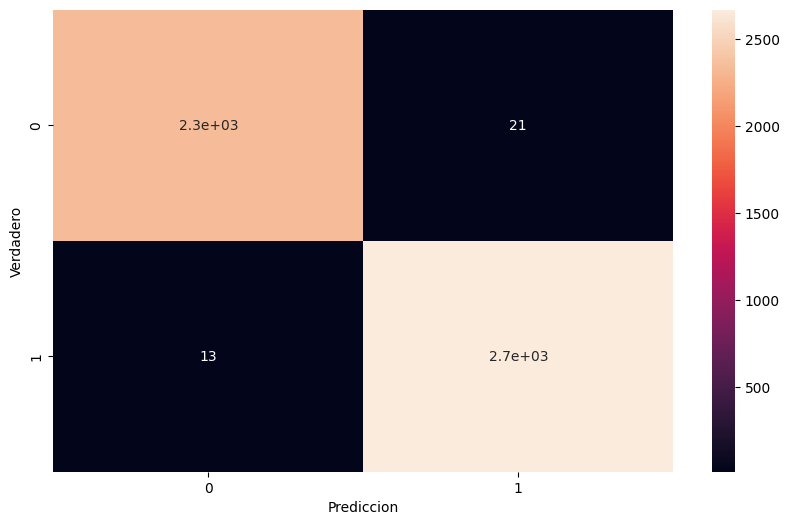

In [26]:
plt.figure(figsize=(10,6))
sn.heatmap(mconf,annot=True)
plt.xlabel('Prediccion')
plt.ylabel('Verdadero')